In [102]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np
import statsmodels.formula.api as smf
from sklearn.preprocessing import StandardScaler
pd.set_option('display.float_format', lambda x: '%.3f' % x)

Contenido_de_Nitrogeno: Proporción de contenido de nitrógeno en el
suelo.
Contenido_de_Fosforo: Proporción de contenido de fósforo en el suelo.
Contenido_de_Potasio: Proporción de contenido de potasio en el suelo.
Temperatura_C: Temperatura en grados Celsius.
Humedad_Relativa: Humedad relativa en porcentaje.
Nivel_de_pH: Nivel de pH del suelo.
Precipitacion_mm: Cantidad de precipitación en milímetros.
Tipo_de_Cultivo: Tipo de cultivo recomendado en función de los
parámetros anteriores.

a. Análisis Exploratorio de Datos (EDA)
Para realizar un EDA exhaustivo del dataset, considere las siguientes
preguntas:

¿Cómo se distribuyen los valores en cada una de las variables?

¿Existen correlaciones entre las diferentes variables del suelo y los tipos de cultivos?

¿Cómo varía la recomendación de cultivo según las condiciones del
suelo y el clima?

¿Existen valores atípicos o faltantes que deban ser tratados?


In [103]:
df = pd.read_csv('tipo_cultivo.csv')
cultivos = df.copy()
cultivos.shape


(2200, 9)

Los datos tienen 2200 filas y 9 columnas

In [104]:
cultivos.head()

,Unnamed: 0,Contenido_de_Nitrogeno,Contenido_de_Fosforo,Contenido_de_Potasio,Temperatura_C,Humedad_Relativa,Nivel_de_pH,Precipitacion_mm,Tipo_de_Cultivo
0,0,90,42,43,20.880,82.003,6.503,202.936,rice
1,1,85,58,41,21.770,80.320,7.038,226.656,rice
2,2,60,55,44,23.004,82.321,7.840,263.964,rice
3,3,74,35,40,26.491,80.158,6.980,242.864,rice
4,4,78,42,42,20.130,81.605,7.628,262.717,rice


In [105]:
cultivos.tail()

,Unnamed: 0,Contenido_de_Nitrogeno,Contenido_de_Fosforo,Contenido_de_Potasio,Temperatura_C,Humedad_Relativa,Nivel_de_pH,Precipitacion_mm,Tipo_de_Cultivo
2195,2195,107,34,32,26.775,66.413,6.780,177.775,coffee
2196,2196,99,15,27,27.417,56.636,6.087,127.925,coffee
2197,2197,118,33,30,24.132,67.225,6.363,173.323,coffee
2198,2198,117,32,34,26.272,52.127,6.759,127.175,coffee
2199,2199,104,18,30,23.603,60.396,6.780,140.937,coffee


Tipos de datos

In [106]:
cultivos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              2200 non-null   int64  
 1   Contenido_de_Nitrogeno  2200 non-null   int64  
 2   Contenido_de_Fosforo    2200 non-null   int64  
 3   Contenido_de_Potasio    2200 non-null   int64  
 4   Temperatura_C           2200 non-null   float64
 5   Humedad_Relativa        2200 non-null   float64
 6   Nivel_de_pH             2200 non-null   float64
 7   Precipitacion_mm        2200 non-null   float64
 8   Tipo_de_Cultivo         2200 non-null   object 
dtypes: float64(4), int64(4), object(1)
memory usage: 154.8+ KB


In [107]:
cultivos = cultivos.drop(columns=['Unnamed: 0']) #borro esta columna para not ener doble indice

Con validate columns puedo ver las columnas con sus nombres, la cantidad de valores unicos por columna (y cuales son), la cantidad y % de nulos y una muestra de valores de esa columna

In [108]:
from funciones_importantes import validate_columns


In [109]:
validate_columns(cultivos)

,Column,Unique_Values,Num_Unique_Values,Num_Null_Values,Sample_Unique_Values,%_null
0,Contenido_de_Nitrogeno,"[90, 85, 60, 74, 78, 69, 94, 89, 68, 91, 93, 7...",137,0,"[70, 48, 2, 110, 68]",0.000
1,Contenido_de_Fosforo,"[42, 58, 55, 35, 37, 53, 54, 46, 56, 50, 48, 3...",117,0,"[41, 58, 75, 17, 66]",0.000
2,Contenido_de_Potasio,"[43, 41, 44, 40, 42, 38, 36, 37, 39, 35, 45, 1...",73,0,"[38, 21, 30, 47, 50]",0.000
3,Temperatura_C,"[20.87974371, 21.77046169, 23.00445915, 26.491...",2200,0,"[29.10968327, 25.42517036, 25.2990432, 10.8987...",0.000
4,Humedad_Relativa,"[82.00274423, 80.31964408, 82.3207629, 80.1583...",2200,0,"[83.12053888, 86.35590206, 24.54038287, 68.933...",0.000
5,Nivel_de_pH,"[6.502985292000001, 7.038096361, 7.840207144, ...",2200,0,"[7.966605025, 8.718192847000001, 6.465906333, ...",0.000
6,Precipitacion_mm,"[202.9355362, 226.6555374, 263.9642476, 242.86...",2200,0,"[83.74606679, 110.9633894, 77.54294240000002, ...",0.000
7,Tipo_de_Cultivo,"[rice, maize, chickpea, kidneybeans, pigeonpea...",22,0,"[chickpea, lentil, jute, coffee, blackgram]",0.000


Se observa que los datos no tienen valores nulos, por lo tanto sigo con el analisis 

In [110]:
cultivos.describe() #medidas estdisticas simples para cada columna


,Contenido_de_Nitrogeno,Contenido_de_Fosforo,Contenido_de_Potasio,Temperatura_C,Humedad_Relativa,Nivel_de_pH,Precipitacion_mm
count,2200.000,2200.000,2200.000,2200.000,2200.000,2200.000,2200.000
mean,50.552,53.363,48.149,25.616,71.482,6.469,103.464
std,36.917,32.986,50.648,5.064,22.264,0.774,54.958
min,0.000,5.000,5.000,8.826,14.258,3.505,20.211
25%,21.000,28.000,20.000,22.769,60.262,5.972,64.552
50%,37.000,51.000,32.000,25.599,80.473,6.425,94.868
75%,84.250,68.000,49.000,28.562,89.949,6.924,124.268
max,140.000,145.000,205.000,43.675,99.982,9.935,298.560


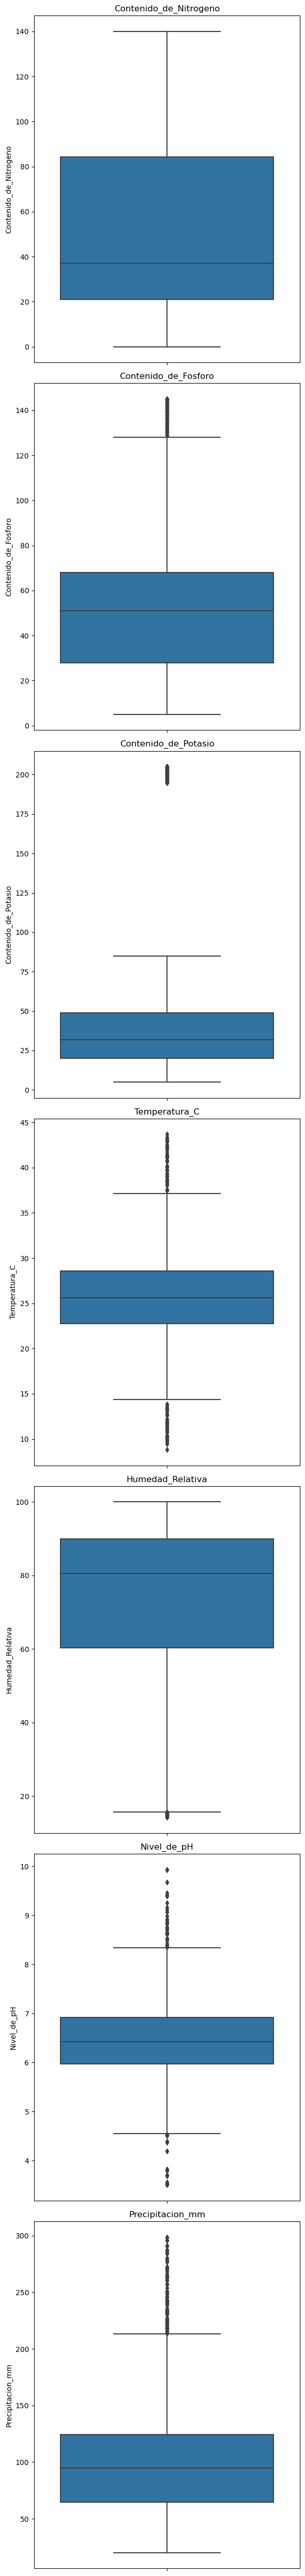

In [111]:
from funciones_importantes import grafico_out_boxplot
grafico_out_boxplot(cultivos)

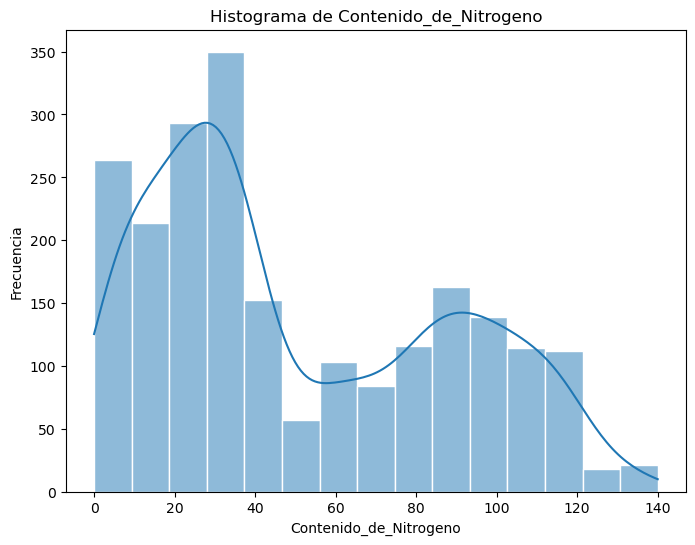

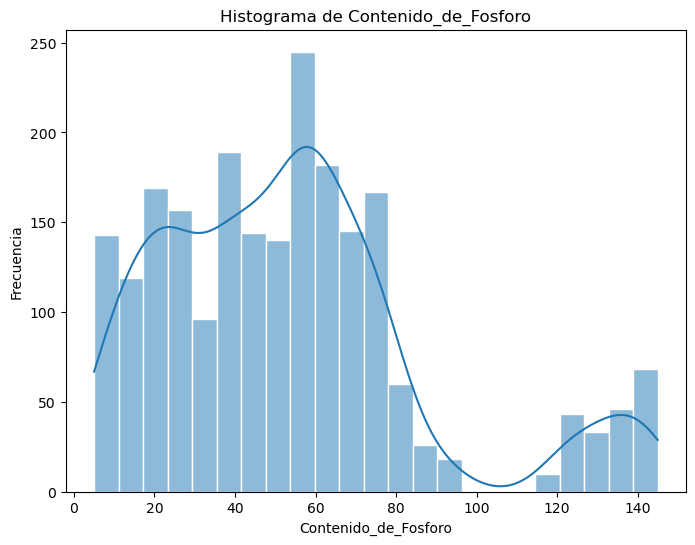

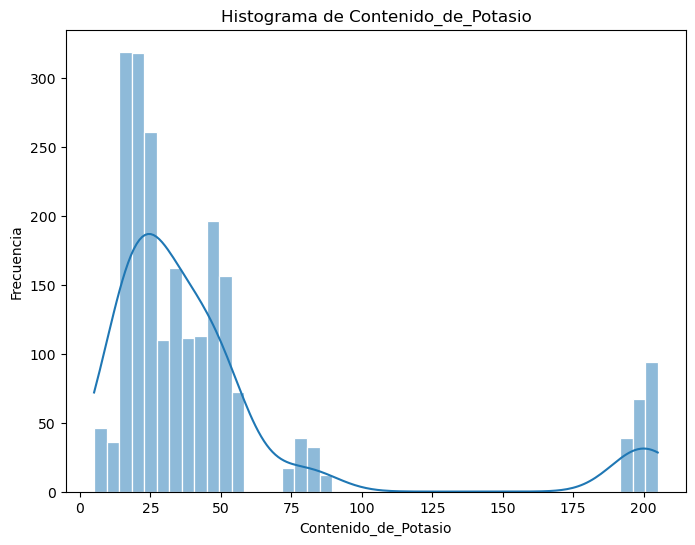

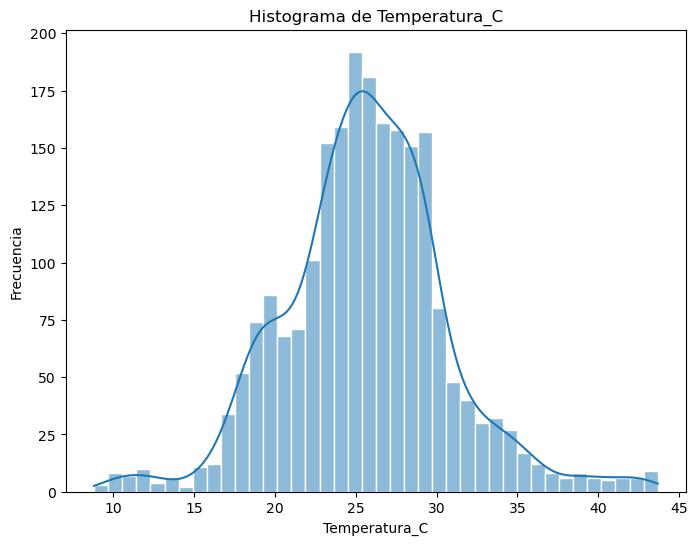

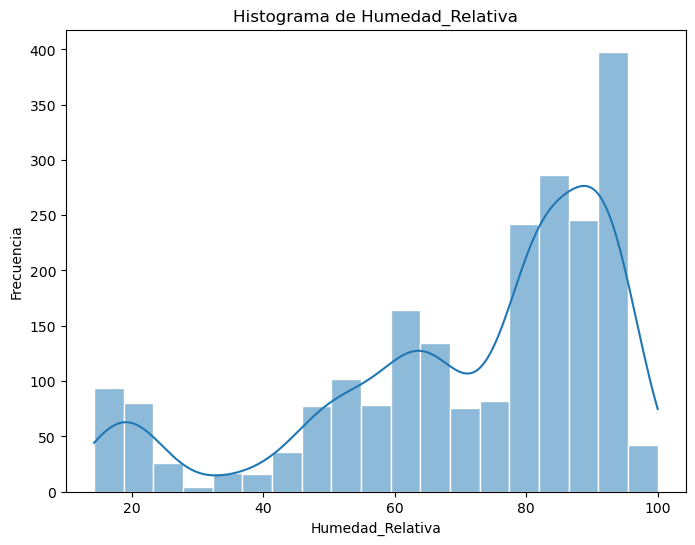

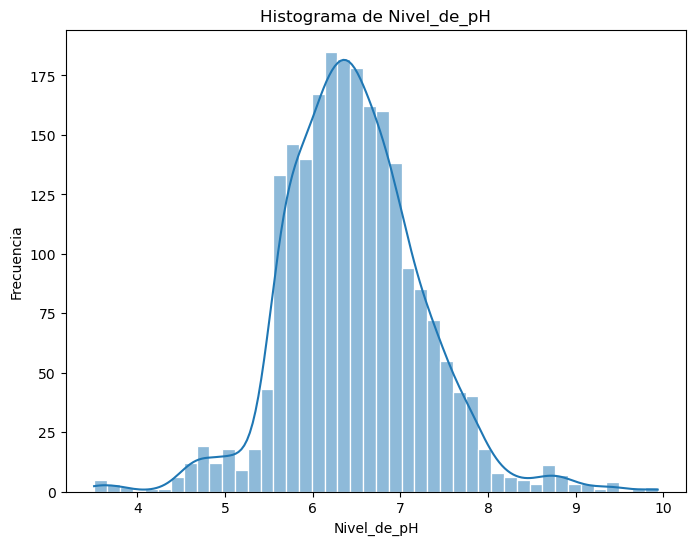

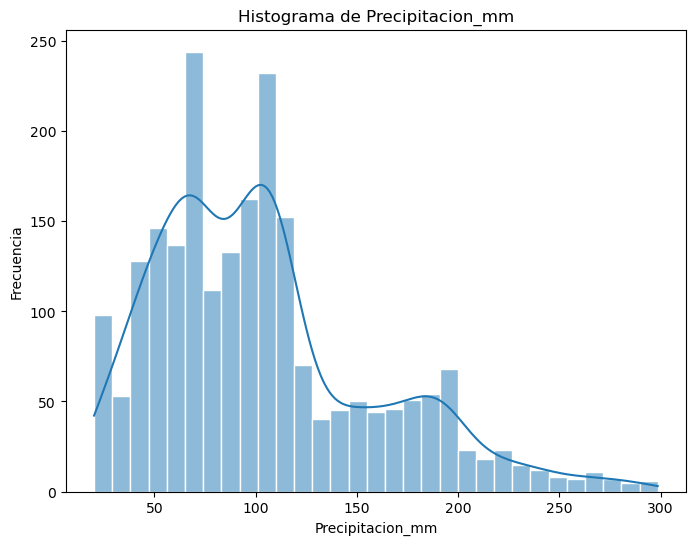

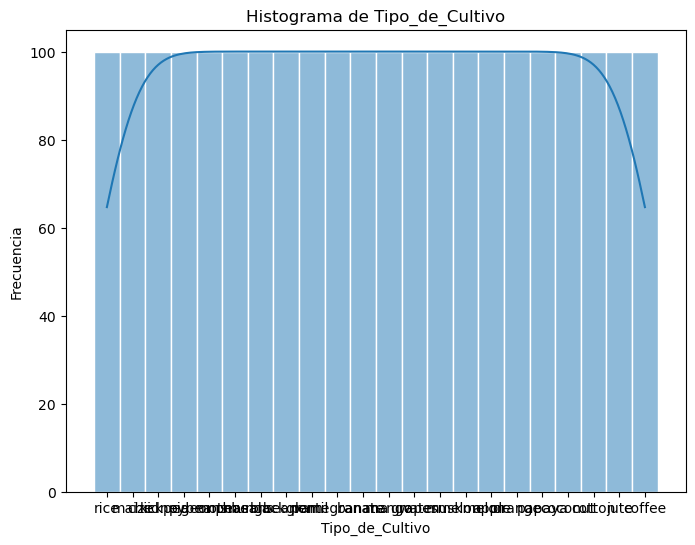

In [112]:
from funciones_importantes import plot_histograms

plot_histograms(cultivos)

In [113]:
from sklearn.preprocessing import OneHotEncoder

tipodecultivo_ohe = OneHotEncoder(sparse=False)
tipodecultivo_ohe.fit(cultivos[['Tipo_de_Cultivo']])
tipodecultivo_ohe.categories_

c:\Users\chiar\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[array(['apple', 'banana', 'blackgram', 'chickpea', 'coconut', 'coffee',
        'cotton', 'grapes', 'jute', 'kidneybeans', 'lentil', 'maize',
        'mango', 'mothbeans', 'mungbean', 'muskmelon', 'orange', 'papaya',
        'pigeonpeas', 'pomegranate', 'rice', 'watermelon'], dtype=object)]

In [114]:
cultivos.columns

Index(['Contenido_de_Nitrogeno', 'Contenido_de_Fosforo',
       'Contenido_de_Potasio', 'Temperatura_C', 'Humedad_Relativa',
       'Nivel_de_pH', 'Precipitacion_mm', 'Tipo_de_Cultivo'],
      dtype='object')

In [115]:
cultivos['apple'],cultivos['banana'],cultivos['blackgram'],cultivos['chickpea'],cultivos['coconut'],cultivos['coffee'],cultivos['cotton'],cultivos['grapes'],cultivos['jute'],cultivos['kidneybeans'],cultivos['lentil'],cultivos['maize'],cultivos['mango'],cultivos['mothbeans'],cultivos['mungbean'],cultivos['muskmelon'],cultivos['orange'],cultivos['papaya'],cultivos['pigeonpeas'],cultivos['pomegranate'],cultivos['rice'],cultivos['watermelon'] = tipodecultivo_ohe.fit_transform(cultivos[['Tipo_de_Cultivo']]).T 
#cultivos.drop(columns=['Tipo_de_Cultivo'], inplace=True) 
cultivos.head()

c:\Users\chiar\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,Contenido_de_Nitrogeno,Contenido_de_Fosforo,Contenido_de_Potasio,Temperatura_C,Humedad_Relativa,Nivel_de_pH,Precipitacion_mm,Tipo_de_Cultivo,apple,banana,...,mango,mothbeans,mungbean,muskmelon,orange,papaya,pigeonpeas,pomegranate,rice,watermelon
0,90,42,43,20.880,82.003,6.503,202.936,rice,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000
1,85,58,41,21.770,80.320,7.038,226.656,rice,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000
2,60,55,44,23.004,82.321,7.840,263.964,rice,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000
3,74,35,40,26.491,80.158,6.980,242.864,rice,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000
4,78,42,42,20.130,81.605,7.628,262.717,rice,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000


#tengo que hacer un boxplot de la relacion de cada uno por tipo de cultivo

In [117]:
cultivos2=cultivos.drop(columns=['Tipo_de_Cultivo'])
cultivos2

,Contenido_de_Nitrogeno,Contenido_de_Fosforo,Contenido_de_Potasio,Temperatura_C,Humedad_Relativa,Nivel_de_pH,Precipitacion_mm,apple,banana,blackgram,...,mango,mothbeans,mungbean,muskmelon,orange,papaya,pigeonpeas,pomegranate,rice,watermelon
0,90,42,43,20.880,82.003,6.503,202.936,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000
1,85,58,41,21.770,80.320,7.038,226.656,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000
2,60,55,44,23.004,82.321,7.840,263.964,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000
3,74,35,40,26.491,80.158,6.980,242.864,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000
4,78,42,42,20.130,81.605,7.628,262.717,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2195,107,34,32,26.775,66.413,6.780,177.775,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2196,99,15,27,27.417,56.636,6.087,127.925,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2197,118,33,30,24.132,67.225,6.363,173.323,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2198,117,32,34,26.272,52.127,6.759,127.175,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


<Axes: >

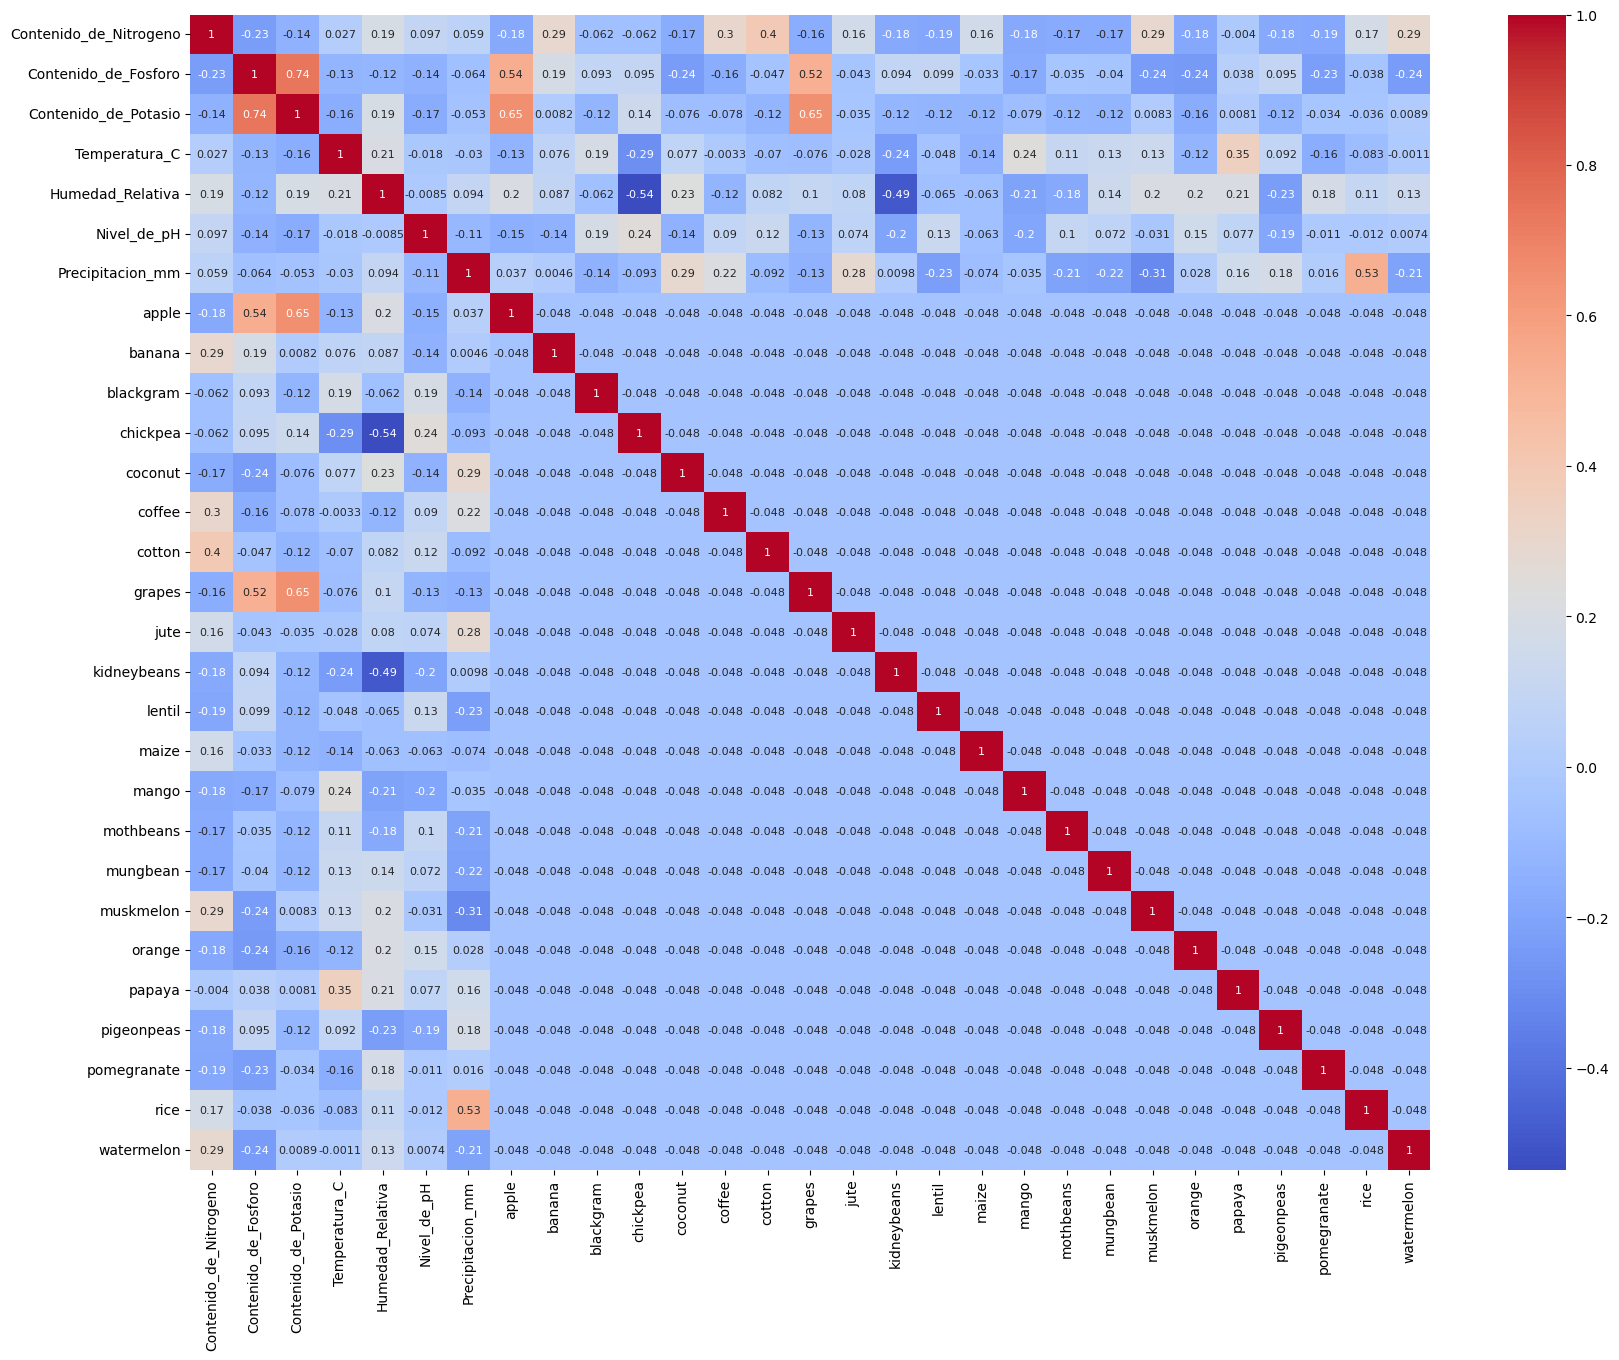

In [118]:
plt.figure(figsize=(20,15))
sns.heatmap(
    cultivos2.corr(),
    cmap = 'coolwarm',
    annot = True,
    annot_kws= {"size":8})

In [ ]:
cultivos voy a usaer ese para hacer los boxplot

 Machine Learning

En esta sección, implementaremos dos modelos de Machine Learning
para predecir el Tipo_de_Cultivo basándonos en las variables del suelo
y del clima. Utilizaremos una Regresión Logística y un Árbol de
Decisión.
Consigna para la Implementación del Código:
Utilice el siguiente código de Python como base para implementar el
modelo de Árbol de Decisión:

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
